Hi các bạn, cũng đã đến những buổi cuối cùng của lớp Python Private, chúng ta đã đi qua nhiều kiến thức cơ bản cũng như các thư viện hữu dụng cho hướng phát triển của lớp sau này, bài tập này là bài tập tổng hợp lại kiến thức cho các bạn trước khi bước vào bài tập lớn cuối khóa nhé.

Yêu cầu chung cho bài tập như sau:
- Tạo folder finalHomework trên drive của mình, tạo bản sao từ google colab này và lưu lại trong đó
- Ở các vị trị có dấu ... các bạn sẽ thay thế nó bằng câu lệnh phù hợp nhé
- Có thể thêm cell code để tách rời các đoạn code cho rõ ràng hơn
- Link dataset:
  + Fifa World Cup 2022 Qatar: [data](https://drive.google.com/drive/folders/1toqv_FTlsi6-NfswfzKnK9GBYAE8i57L?usp=sharing)

Anh mong các bạn sẽ làm bài tập đầy đủ để có thể review lại kiến thức của bản thân nhé !!!

Yêu các bạn <3



# Set up

## Import các thư viện cần thiết

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import os
sns.set_style("whitegrid")
sns.set_context("paper")
import warnings
warnings.filterwarnings('ignore')

## Kết nối với google drive

In [ ]:
# from google.colab import drive

## Di chuyển đến thư mục chứa google colab

In [ ]:
# drive.mount('/content/drive')

Mounted at /content/drive


## Upload file

In [ ]:
# from ... import ...
# uploaded = ...

## List các file trong thư mục

In [ ]:
# directory_path = '/content/drive/MyDrive/Colab Notebooks/finalHomework'
# directory_files = os.listdir(directory_path)

# for file in directory_files:
#   print(file)

matches_world_cup_2022_catar.csv
Hung's finalHomework.ipynb


# Numpy

In [ ]:
# Init
import random
import numpy as np

prices = list(range(1, 1000000))
random.shuffle(prices)

In [ ]:
# hàm ban đầu
def find_max_down_fall(prices):
  min_right_to_left = [0 for i in range((len(prices)))]

  min_so_far = float('inf')
  for i in range(len(prices) -1, -1, -1):
    min_so_far = min(prices[i], min_so_far)
    min_right_to_left[i] = min_so_far

  res = 0
  for i, buy in enumerate(prices):
    worst_sell = min_right_to_left[i]
    down_fall = (buy - worst_sell) / buy
    res = max(res, down_fall)

  return res

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall
%timeit find_max_down_fall(prices)

The slowest run took 4.36 times longer than the fastest. This could mean that an intermediate result is being cached.
1.65 s ± 1.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# hàm sau khi được viết lại bằng numpy
def find_max_down_fall_np(prices_np):
  prices = np.array(prices_np)

  # Tính giá trị tích tụ nhỏ nhất từ phải sang trái
  min_right_to_left = np.minimum.accumulate(prices[::-1])[::-1]

  # Tính giá trị lỗ lớn nhất
  res = np.max((prices - min_right_to_left) / prices)

  return res

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall sau khi được viết lại bằng numpy với thời gian kì vọng nhanh hơn khoảng 100 lần
# start your code here
prices_np = np.array([prices])
# end your code

%timeit find_max_down_fall_np(prices_np)

22.8 ms ± 855 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# so sánh kết quả
find_max_down_fall(prices) == find_max_down_fall_np(prices_np)

False

# Pandas + Matplotlib

## Gọi file csv

In [29]:
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/finalHomework/matches_world_cup_2022_catar.csv")
df = pd.read_csv(r"assets\matches_world_cup_2022_catar.csv")

df.head()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,0.39,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."


In [6]:
df.columns

Index(['match_id', 'stage', 'date', 'pens', 'pens_home_score',
       'pens_away_score', 'team_name_home', 'team_name_away',
       'team_home_score', 'team_away_score', 'possession_home',
       'possession_away', 'total_shots_home', 'total_shots_away',
       'shots_on_target_home', 'shots_on_target_away', 'duels_won_home',
       'duels_won_away', 'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win', 'prediction_quantity', 'location',
       'events_list', 'lineup_home', 'lineup_away', 'player_names_home',
       'player_numbers_home', 'player_names_away', 'player_numbers_away'],
      dtype='object')

In [7]:
df_matches = df.drop('events_list', axis=1)
df_events = df[['match_id', 'team_name_home',	'team_name_away', 'events_list']]

## Hiển thị 5 dòng đầu của dataframe

In [8]:
display(df_matches.head())
display(df_events.head())

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.03,0.33,1002364,Lusail Iconic Stadium,"[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.04,0.54,367156,Khalifa International Stadium,"[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,0.03,0.39,720768,Al Bayt Stadium,"[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.04,0.25,792326,Lusail Iconic Stadium,"[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.05,0.55,672577,Al Bayt Stadium,"[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."


,match_id,team_name_home,team_name_away,events_list
0,1,Argentina,France,"[{'event_team': 'home', 'event_time': "" 23' "",..."
1,2,Croatia,Morocco,"[{'event_team': 'home', 'event_time': "" 7' "", ..."
2,3,France,Morocco,"[{'event_team': 'home', 'event_time': "" 5' "", ..."
3,4,Argentina,Croatia,"[{'event_team': 'away', 'event_time': "" 32' "",..."
4,5,England,France,"[{'event_team': 'away', 'event_time': "" 17' "",..."


## Hiển thị 5 dòng cuối của các dataframe

In [9]:
display(df_matches.tail())
display(df_events.tail())

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
59,60,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,...,0.02,0.04,657383,Lusail Iconic Stadium,"[{'player_name': ' Martínez ', 'player_number'...","[{'player_name': ' Al-Shehri ', 'player_number...","['Martínez', 'Messi', 'Gómez', 'Paredes', 'De ...","['22', '10', '17', '5', '7', '11', '3', '19', ...","['Al-Shehri', 'Al-Dawsari', 'Kanno', 'Al-Faraj...","['11', '10', '23', '7', '9', '8', '13', '5', '..."
60,61,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,...,0.09,0.40,361145,Ahmad bin Ali Stadium,"[{'player_name': ' Pulisic ', 'player_number':...","[{'player_name': ' James ', 'player_number': '...","['Pulisic', 'Sargent', 'Weah', 'Musah', 'Adams...","['10', '24', '21', '6', '4', '8', '5', '13', '...","['James', 'Bale', 'Williams', 'Wilson', 'Ampad...","['20', '11', '3', '8', '15', '10', '14', '4', ..."
61,62,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,...,0.07,0.71,457977,Al Thumama Stadium,"[{'player_name': ' Dia ', 'player_number': ' 9...","[{'player_name': ' Bergwijn ', 'player_number'...","['Dia', 'Sarr', 'Gueye', 'Diatta', 'Mendy', 'K...","['9', '18', '5', '15', '6', '8', '22', '4', '3...","['Bergwijn', 'Janssen', 'Gakpo', 'Blind', 'De ...","['7', '18', '8', '17', '21', '11', '22', '5', ..."
62,63,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,...,0.02,0.06,498752,Khalifa International Stadium,"[{'player_name': ' Kane ', 'player_number': ' ...","[{'player_name': ' Taremi ', 'player_number': ...","['Kane', 'Sterling', 'Mount', 'Saka', 'Rice', ...","['9', '10', '19', '17', '4', '22', '3', '6', '...","['Taremi', 'Hajsafi', 'Karimi', 'Nourollahi', ...","['9', '3', '18', '21', '7', '5', '19', '15', '..."
63,64,Group stage: Matchday 1,20/11/2022,False,False,False,Qatar,Ecuador,0,2,...,0.06,0.66,528736,Al Bayt Stadium,"[{'player_name': ' Afif ', 'player_number': ' ...","[{'player_name': ' Estrada ', 'player_number':...","['Afif', 'Almoez', 'Abdulaziz', 'Boudiaf', 'Al...","['11', '19', '6', '12', '10', '14', '3', '16',...","['Estrada', 'Valencia', 'Ibarra', 'Caicedo', '...","['11', '13', '10', '23', '20', '19', '7', '3',..."


,match_id,team_name_home,team_name_away,events_list
59,60,Argentina,Saudi Arabia,"[{'event_team': 'home', 'event_time': "" 10' "",..."
60,61,USA,Wales,"[{'event_team': 'home', 'event_time': "" 11' "",..."
61,62,Senegal,Netherlands,"[{'event_team': 'away', 'event_time': "" 56' "",..."
62,63,England,Iran,"[{'event_team': 'away', 'event_time': "" 20' "",..."
63,64,Qatar,Ecuador,"[{'event_team': 'away', 'event_time': "" 4' "", ..."


## In ra thông tin của từng dataframe

In [10]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  64 non-null     int64  
 1   stage                     64 non-null     object 
 2   date                      64 non-null     object 
 3   pens                      64 non-null     bool   
 4   pens_home_score           64 non-null     object 
 5   pens_away_score           64 non-null     object 
 6   team_name_home            64 non-null     object 
 7   team_name_away            64 non-null     object 
 8   team_home_score           64 non-null     int64  
 9   team_away_score           64 non-null     int64  
 10  possession_home           64 non-null     float64
 11  possession_away           64 non-null     float64
 12  total_shots_home          64 non-null     int64  
 13  total_shots_away          64 non-null     int64  
 14  shots_on_tar

In [11]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        64 non-null     int64 
 1   team_name_home  64 non-null     object
 2   team_name_away  64 non-null     object
 3   events_list     64 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


- Hãy kiểm tra xem các data frame có giá trị null không
- Nếu có hãy trình bày cách giải quyết của bản thân đối với dữ liệu null đó, và code cách giải quyết dưới cell code bên dưới
- Nếu không có cách giải quyết thì cũng ghi là không có cách giải quyết


Ghi cách giải quyết của bản thân vào đây: ...

In [12]:
df.isnull().sum().sum()

0

- Như vậy thì dữ liệu trên không có dữ liệu Null
- Nhưng nếu có thì chúng ta có thể fill các dữ liệu trên theo giá trị mean, max, median,.. hoặc có thể xóa đi những dữ liệu đó
tùy theo cách chúng ta giải quyết.

## Lấy ra các trận đấu có từ 3 bàn thắng trở lên (ghi ra tên cặp đấu)

In [13]:
df_matches[df_matches['team_home_score'] >= 3][['team_name_home','team_name_away']]

,team_name_home,team_name_away
0,Argentina,France
3,Argentina,Croatia
8,Portugal,Switzerland
10,Brazil,South Korea
12,England,Senegal
13,France,Poland
15,Netherlands,USA
35,Cameroon,Serbia
37,Croatia,Canada
49,Portugal,Ghana


## Thống kê các sân vận động diễn ra các trận đấu và hiển thị tỷ lệ phần trăm của các sân vận động bằng biểu đồ thích hợp

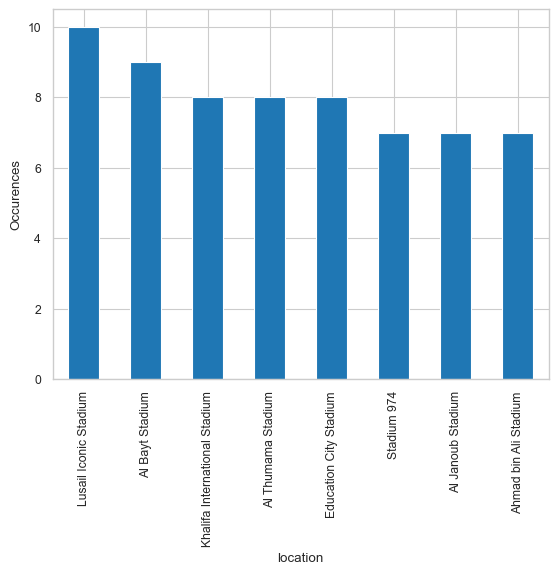

In [14]:
df['location'].value_counts().plot(kind='bar')
plt.ylabel("Occurences")
plt.show()

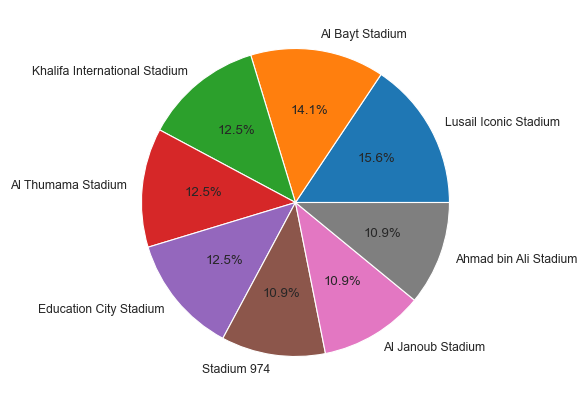

In [15]:
df['location'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5))
plt.ylabel("")
plt.show()

## Lấy ra tên của các đội tham dự giải đấu

In [16]:
df_matches['team_name_home'].unique()

array(['Argentina', 'Croatia', 'France', 'England', 'Morocco',
       'Netherlands', 'Portugal', 'Brazil', 'Japan', 'Cameroon', 'Serbia',
       'South Korea', 'Ghana', 'Costa Rica', 'Canada', 'Poland',
       'Saudi Arabia', 'Tunisia', 'Australia', 'Wales', 'Iran', 'Ecuador',
       'Spain', 'Belgium', 'Qatar', 'Uruguay', 'Switzerland', 'Germany',
       'Mexico', 'Denmark', 'USA', 'Senegal'], dtype=object)

## Lấy ra số bàn thắng được ghi bởi các đội

In [17]:
home = df_matches.groupby('team_name_home')['team_home_score'].sum()
away = df_matches.groupby('team_name_away')['team_away_score'].sum()
goals = (home + away).sort_values(ascending=False)
goals

team_name_home
France          16
Argentina       15
England         13
Portugal        12
Netherlands     10
Spain            9
Brazil           8
Croatia          8
Morocco          6
Germany          6
Switzerland      5
South Korea      5
Ghana            5
Japan            5
Senegal          5
Serbia           5
Ecuador          4
Iran             4
Australia        4
Cameroon         4
Costa Rica       3
USA              3
Poland           3
Saudi Arabia     3
Uruguay          2
Mexico           2
Canada           2
Qatar            1
Denmark          1
Tunisia          1
Belgium          1
Wales            1
dtype: int64

## Vẽ biểu đồ thể hiện số bàn thắng được ghi bởi mỗi đội (tự chọn kiểu biểu đồ phù hợp)

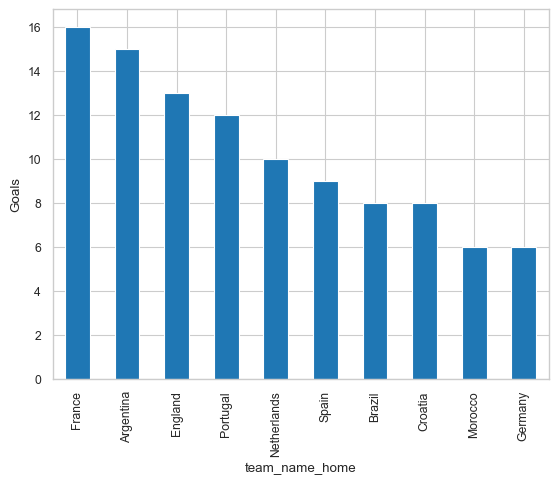

In [18]:
goals.head(10).plot(kind='bar')
plt.ylabel("Goals");

##Thống kê số lượng bàn thắng được ghi bởi các cầu thủ Argentina bằng biểu đồ tròn

- Yêu cầu phải có tiêu đề cho biểu đồ, chú thích
- Có tỷ lệ phần trăm cho từng cầu thủ
- Tách phần của Alexis Mac Allister ra khỏi biểu đồ

In [19]:
def get_goals_scored(data, country_name=False, match_turn= 'both', get_assits_scored=False):

    '''
    Return a dictionary of goals scored by each player
    ## Parameters:
1. `data`: Dataframe

2. `country_name`: optional, represents the name of a specific country. If provided, the function will filter the matches based on the country name before counting the goals scored.

3. `match_turn`: optional, determines which matches turn to consider for counting goals. It can take three possible values:
   - `'both'`: This is the default value. It means that goals from both home and away matches will be counted.
   - `'home'`: Only goals from home matches will be counted.
   - `'away'`: Only goals from away matches will be counted.

4. `get_assits_scored`: optional, determines whether to count assists along with goals. If set to `True`, the function will count both goals and assists. If set to `False` (default), only goals will be counted.
    '''
    if match_turn == 'both':
        match_turn = ['home', 'away']
    else:
        match_turn = [match_turn]

    goals_count = pd.Series()
    assits_count = pd.Series() if get_assits_scored else None

    matches = data

    for turn in match_turn:
        if country_name:
            matches = data[data['team_name_' + turn] == country_name]

        events_list = matches['events_list'].apply(eval)
        for events in events_list:
            for event in events:
                if event['event_team'] == turn and event['event_type'] in ['Penalty' ,'Goal']:
                    player_name = event['action_player_1'].strip()
                    goals_count[player_name] = goals_count.get(player_name, 0) + 1

                    if event['event_type'] == 'Goal' and get_assits_scored and 'action_player_2' in event:
                        assits_player_name = event['action_player_2'].strip()
                        assits_count[assits_player_name] = assits_count.get(assits_player_name, 0) + 1
    if get_assits_scored:
        return goals_count, assits_count
    return goals_count

In [30]:
argentina = get_goals_scored(df_events, 'Argentina', match_turn='both').drop('Alexis Mac Allister')

fig = px.pie(values=argentina.values, names=argentina.index, title='Percentage of Goals Scored by Players in Argentina')
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    marker=dict(colors=px.colors.qualitative.Pastel)
)

fig.update_layout(
    title_font=dict(size=20),
    legend=dict(
        title='Players',
        font=dict(size=12),
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        xanchor='center',
        x=0.5
    )
)
import plotly.io as pio

# Set the file path and name
file_path = "plot.png"

# Save the plot as an image
pio.write_image(fig, file_path)

fig.show()

## Thống kê tỷ lệ ra sân của các cầu thủ Pháp bằng biểu đồ

In [21]:
def get_times_to_field(data, country_name, match= 'both'):
    # '''
    # The `get_times_to_field` function is designed to calculate the number of times a player from a specific country has entered the field in a given dataset
    # '''
    if match == 'both':
        match = ['home', 'away']
    else:
        match = [match]

    # Filter the data for the specific country and match type
    times_to_field = pd.Series()
    for turn in match:
        # Filter the data for the specific country and match type
        filtered_data = data[data['team_name_'+ turn].eq(country_name)]

        # Apply eval to the 'lineup_home' column and explode the resulting Series
        exploded_data = filtered_data['lineup_'+ turn].apply(eval).explode('lineup_'+ turn)
        # Extract the 'player_name' values and count their occurrences

        player_counts = exploded_data.str.get('player_name').value_counts()

        # Add the counts to the 'times_to_field' Series
        times_to_field = times_to_field.add(player_counts, fill_value=0).astype(int)
    return times_to_field

france = get_times_to_field(df_matches, 'France', match='both').sort_values(ascending=False)
france

 Tchouaméni     7
 Mbappé         6
 Dembélé        6
 Varane         6
 Giroud         6
 Griezmann      6
 Hernandez      6
 Lloris         6
 Upamecano      5
 Rabiot         5
 Koundé         5
 Konaté         3
 Fofana         2
 Pavard         1
 Camavinga      1
 Mandanda       1
 Coman          1
 Kolo Muani     1
 Guendouzi      1
 Disasi         1
 Veretout       1
dtype: int32

Text(0.5, 0.98, 'France players')

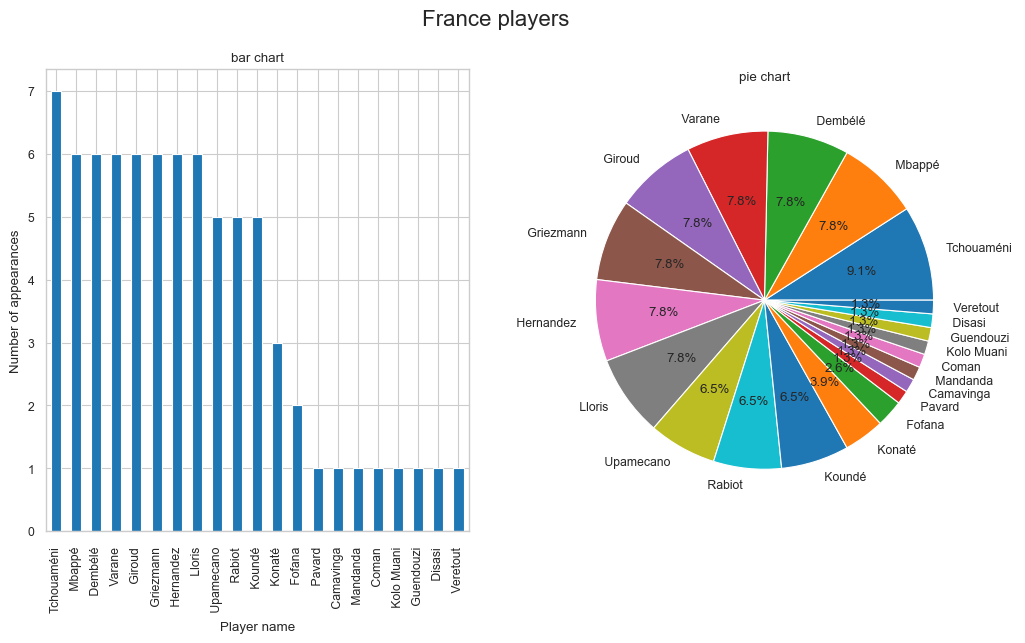

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# bar chart
france.plot(kind='bar', ax=ax[0])
ax[0].set_title('bar chart')
ax[0].set_xlabel('Player name')
ax[0].set_ylabel('Number of appearances')

# Pie chart
france.plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('pie chart')

fig.suptitle('France players', fontsize=16)

## Thống kê danh sách top 10 vua phá lưới của giải đấu
- Nếu trường hợp hai cầu thủ có cùng số bàn thắng thì chọn cầu thủ có số lượng kiến tạo nhiều hơn
- Sử dụng biểu đồ thích hợp để hiển thị số bàn thắng của top 10

In [23]:
goals, assits = get_goals_scored(df_events, get_assits_scored=True)
top_10 = pd.concat([goals, assits], axis=1).sort_values(by=[0,1], ascending=False).head(10)
top_10

,0,1
Kylian Mbappé,8.0,2.0
Lionel Messi,7.0,3.0
Julián Álvarez,4.0,NaN
Olivier Giroud,4.0,NaN
Gonçalo Ramos,3.0,1.0
Álvaro Morata,3.0,1.0
Richarlison,3.0,NaN
Bukayo Saka,3.0,NaN
Cody Gakpo,3.0,NaN
Marcus Rashford,3.0,NaN


In [33]:
fig = go.Figure(data=[go.Bar(x=top_10.index, y=top_10[0])])

# Customize the layout
fig.update_layout(
    title='Top 10 players with the most goals scored',
    xaxis=dict(
        title='Player name',
        tickangle=-45,
        showgrid=False,
        zeroline=False,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Number of goals',
        showgrid=True,
        gridcolor='lightgray',
        zeroline=False,
        tickfont=dict(size=12)
    ),
    plot_bgcolor='white',
    bargap=0.2
)

# Customize the appearance of the bars
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.8)
pio.write_image(fig, r'assets/most_players.png')
fig.show()

# OpenCV

## Tìm bounding box cho các chữ số trong bức ảnh sau: [ảnh](https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png)

- Gợi ý các hàm sử dụng:
  - cv2.threshold
  - cv2.findContours
  - cv2.contourArea
  - cv2.boundingRect

Và các hàm trong thư viện OpenCV đã học hôm trước

In [25]:
# !wget -O picture.png https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
import cv2

# img = cv2.imread("/content/picture.png") ## For Colab
img = cv2.imread(r"assets\picture.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    img = cv2.drawContours(img, [contour], 0, (0, 255, 255), 2)
    img = cv2.rectangle(img, (x,y),(x+w,y+h), (0,255,0),2)

cv2.imwrite("assets/Bounding_img.png", img)

True

Thực hiện vẽ logo của CLB Tin Học HIT bằng OpenCV: [Vẽ logo](https://docs.google.com/document/d/1Wfg10lmyVPzGpCa6BWcMd3fpjYD3OGohoyjzy_JfcWc/edit?usp=sharing)

In [35]:
import cv2
import numpy as np

'''
                WORK FLOW
First, we create a new RGB image with a black background.
Then, we draw a circle in the center of the image.
Next, we draw the text in the center of the image.
Finally, we rotate the image by 90 degrees and put the text in the center of the image.

! Rotate the Side first
'''

# Colors
default_color = (37, 108, 240)
WHITE_COLOR = (255, 255, 255)

# Define the text and font
font = cv2.FONT_HERSHEY_SIMPLEX

# Create a new RGB image
height = 430
width = 350
img = np.zeros((height, width, 3), dtype=np.uint8)

# Circle
center = (width//2, height//2)
radius = 136
thickness_c = 3
cv2.circle(img, center, radius, default_color, thickness_c)
cv2.circle(img, center, radius - thickness_c, WHITE_COLOR, cv2.FILLED)

# sidetext
side_text = 'club'
font_scale = 1
thickness = 4
text_size, _ = cv2.getTextSize(side_text, font, font_scale, thickness)
text_x = center[0] - int(text_size[0] / 2)
text_y = center[1] + int(text_size[1] / 2) +68
cv2.putText(img, side_text, (text_x, text_y), font, font_scale, default_color, thickness)
M = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
rotated_img = cv2.warpAffine(img, M, (width, height))
alpha = 0
blended_img = cv2.addWeighted(img, alpha, rotated_img, 1-alpha, 0)

# Main text
text = 'HIT'
font_scale = 3.5
thickness = 10
text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
text_x = center[0] - int(text_size[0] / 2)
text_y = center[1] + int(text_size[1] / 2)
cv2.putText(blended_img, text, (text_x, text_y), font, font_scale, default_color, thickness)

# subtext
bottom_text = "CLB TIN HOC DH CNHN"
font_scale = .5
thickness = 2
text_size, _ = cv2.getTextSize(bottom_text, font, font_scale, thickness)
text_x = center[0] - int(text_size[0] / 2)
text_y = center[1] + int(text_size[1] / 2) + 68
cv2.putText(blended_img, bottom_text, (text_x, text_y), font, font_scale, default_color, thickness)

# headtext
head_text = "<3"
font_scale = .5
thickness = 4
text_size, _ = cv2.getTextSize(head_text, font, font_scale, thickness)
text_x = center[0] - int(text_size[0] / 2)
text_y = center[1] + int(text_size[1] / 2) - 58
cv2.putText(blended_img, head_text, (text_x, text_y), font, font_scale, default_color, thickness)

# cv2.imshow('logo', blended_img)
# cv2.waitKey(0)
cv2.imwrite('logo.png', blended_img)

'''
New
    * how to blend two image
    * how to rotate image: 2 ways: using cv2.getRotationMatrix2D() and cv2.warpAffine() or cv2.rotate()
    * how to align the text in the center of the image
    * how to get the size of the text
''';

Thực hiện các yêu cầu sau đối với ảnh logo mà bạn vừa vẽ:
- Làm mịn ảnh
- Làm mờ ảnh

Sử dụng các hàm gợi ý sau:
- cv2.filter2D
- cv2.blur
- cv2.GaussianBlur
- cv2.medianBlur
- cv2.bilateralFilter

In [36]:
...

Ellipsis